# Student Scores

April Meyer

DSC680-T301 Applied Data Science (2215-1)

##### Problem Statement
For my second term project I picked student’s exams based on different individual, social, and economic aspects. The goal is to understand how these different aspects could influence the student’s exam scores.   

##### Research Questions
Below are some initial questions that I could explore with this dataset:
1.	How effective is the test preparation course?
2.	Which major factors contribute to test outcomes?
3.	What would be the best way to improve student scores on each test?
 

##### Dataset
The link to the data is https://www.kaggle.com/spscientist/students-performance-in-exams. The dataset is fictional and is only being used for my data science educational purposes.

This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

In [25]:
#all libraries that are need for exercises

import pandas as pd

from pandas_profiling import ProfileReport

# Data manipulation
import numpy as np # linear algebra

# Plot and configure graphics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Transformation of categorical variables
from sklearn.preprocessing import LabelEncoder

# Modelling
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# import into dataframe
StudentsPerformance = pd.read_csv("StudentsPerformance.csv")

# the structure of the data frame
StudentsPerformance.info(verbose=True)

# creating my target variable
StudentsPerformance["mean_scores"] = (StudentsPerformance["math score"] + StudentsPerformance["reading score"] + StudentsPerformance["writing score"]) / 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
profile = ProfileReport(StudentsPerformance, title='Students Scores Profiling Report', explorative = True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Summary statistics for all variables
print("Describe Data")
print(StudentsPerformance.describe())
print("\nSummarized Data")
print(StudentsPerformance.describe(include=['O']))

Describe Data
       math score  reading score  writing score  mean_scores
count  1000.00000    1000.000000    1000.000000  1000.000000
mean     66.08900      69.169000      68.054000    67.770667
std      15.16308      14.600192      15.195657    14.257326
min       0.00000      17.000000      10.000000     9.000000
25%      57.00000      59.000000      57.750000    58.333333
50%      66.00000      70.000000      69.000000    68.333333
75%      77.00000      79.000000      79.000000    77.666667
max     100.00000     100.000000     100.000000   100.000000

Summarized Data
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000 

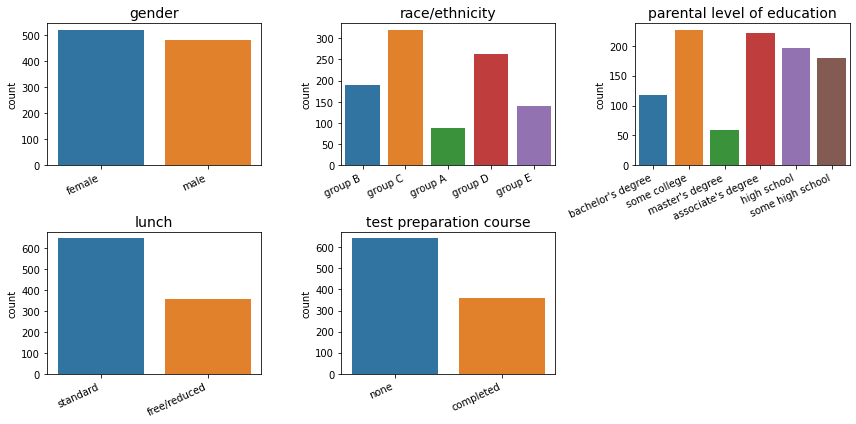

In [5]:
# Categorical count of independent variables
in_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
fig,axarr = plt.subplots(2,3,figsize=(12,6))
axarr[-1, -1].axis('off')
for id,col in enumerate(in_cols):
    ax = axarr.flat[id]
    sns.countplot(x=col, data=StudentsPerformance,ax=ax)
    ax.set_title(col,fontsize=14)
    ax.set_xlabel('')
    plt.setp(ax.get_xticklabels(), rotation=25,ha='right')
plt.tight_layout()
plt.show()

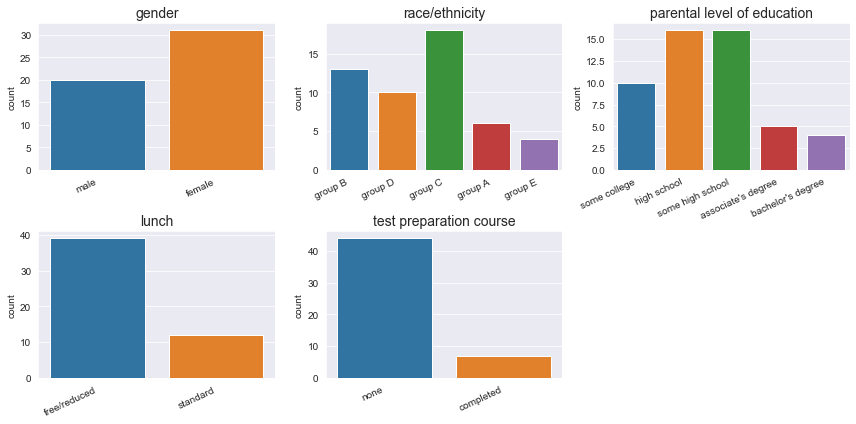

In [36]:
# What factors correlate with low scores? 
# Here we look at count plots for students with scores below 40 in atleast one subject
Low_df = StudentsPerformance[(StudentsPerformance['math score']<40) | (StudentsPerformance['reading score']<40) | (StudentsPerformance['writing score']<40)]
in_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
fig,axarr = plt.subplots(2,3,figsize=(12,6))
axarr[-1, -1].axis('off')
for id,col in enumerate(in_cols):
    ax = axarr.flat[id]
    sns.countplot(x=col, data=Low_df,ax=ax)
    ax.set_title(col,fontsize=14)
    ax.set_xlabel('')
    plt.setp(ax.get_xticklabels(), rotation=25,ha='right')
plt.tight_layout()
plt.show()

In [6]:
def Plot_Set(df,xcol,ycols):
    df = df.sort_values(by=xcol)
    fig,axarr = plt.subplots(1,3,figsize=(12,5))
    for id,ycol in enumerate(ycols):
        medians = df.groupby([xcol])[ycol].median().values
        median_labels = [str(np.round(s, 2)) for s in medians]
        pos = range(len(medians))
        sns.boxplot(x=xcol, y=ycol, data=df,width=0.5,palette='Set3',ax=axarr[id],linewidth=0.5)
        for tick,label in zip(pos,axarr[id].get_xticklabels()):
            axarr[id].text(pos[tick], medians[tick] + 0.5, median_labels[tick], horizontalalignment='center', size='medium', color='k', weight='semibold')
        axarr[id].set_ylim([0,105])
        plt.setp(axarr[id].get_xticklabels(), rotation=25,ha='right')
    #fig.suptitle('Variation of Scores with '+xcol,fontsize=16,y=1.05)
    plt.tight_layout()
    plt.show()

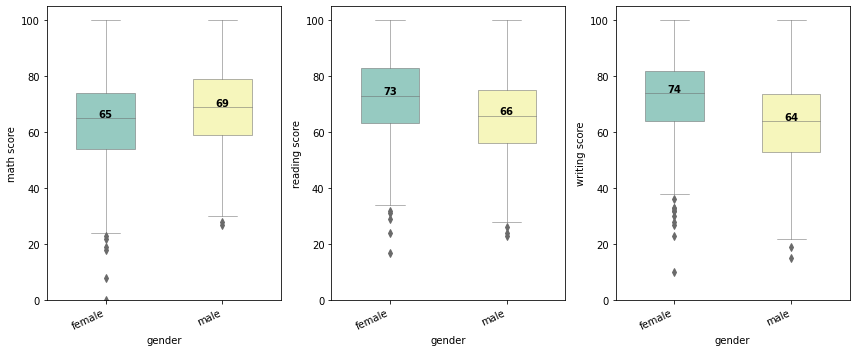

In [7]:
# Variation of Scores with Gender of the student
# Female students beat male counter parts in reading and writing. In math, boys on an average do better than girls.
Plot_Set(StudentsPerformance,xcol='gender',ycols=['math score','reading score','writing score'])

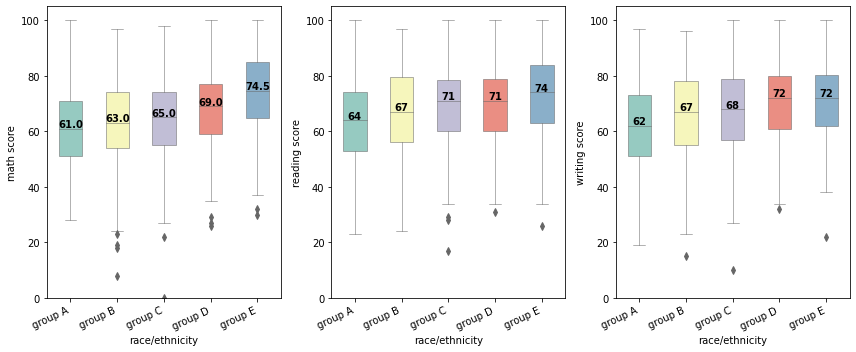

In [8]:
# Variation of Scores with race/ethnicity
# Race has a significant influence on test scores. 
# For all subjects, students in group E perform better than students from other ethnicity.
Plot_Set(StudentsPerformance,xcol='race/ethnicity',ycols=['math score','reading score','writing score'])

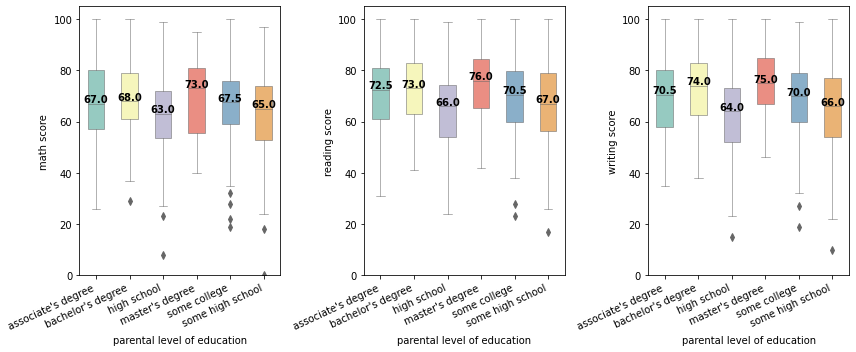

In [9]:
# Variation of Scores with parental level of education
# Education level of parents has a direct impact on the test scores. 
# Higher the education level of the parent, higher the student scores.
Plot_Set(StudentsPerformance,xcol='parental level of education',ycols=['math score','reading score','writing score'])

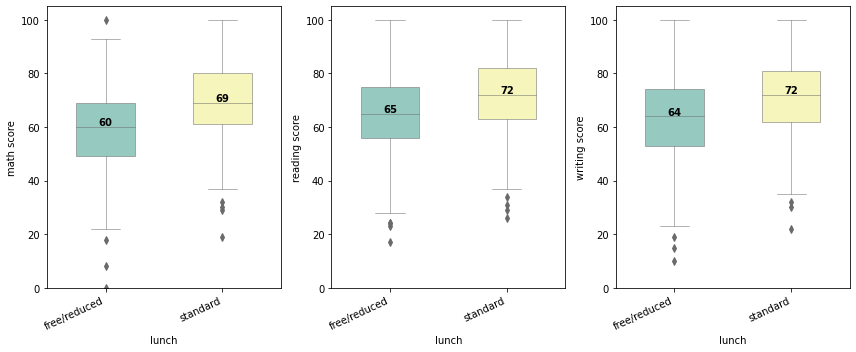

In [10]:
# Variation of Scores with lunch type
# Many schools in the US offer free lunch for students coming from poor families (Ref: https://www.fns.usda.gov/nslp/national-school-lunch-program-nslp)
# Whether the student gets the standard lunch or free/reduced lunch has an impact on the scores. 
# It is evident students from lower income families on an average have 5-10 points lower scores than those who can afford standard lunches.
Plot_Set(StudentsPerformance,xcol='lunch',ycols=['math score','reading score','writing score'])

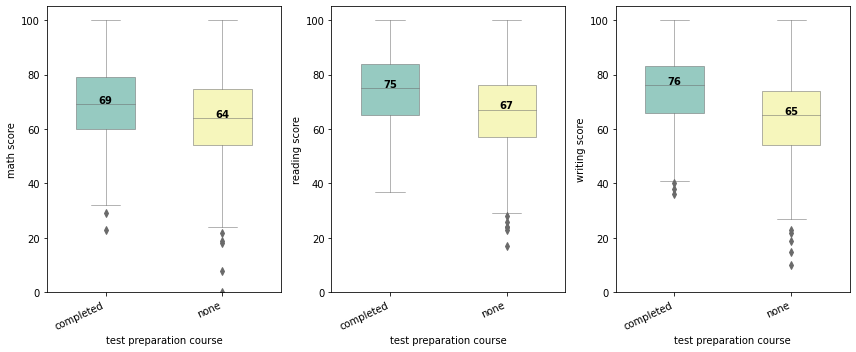

In [11]:
# Variation of Scores with test preparation course
# Students who completed a preparation course prior to the test consistently outperform students who didnt take such a course
Plot_Set(StudentsPerformance,xcol='test preparation course',ycols=['math score','reading score','writing score'])

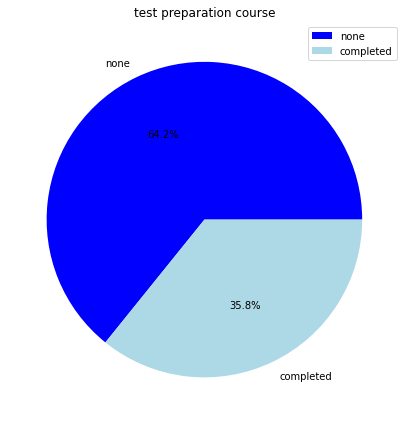

In [12]:
# How many of the students take preparatory classes?
cont_test = StudentsPerformance['test preparation course'].value_counts()
labels = StudentsPerformance['test preparation course'].value_counts().index

fig, ax = plt.subplots(figsize =(6,6))
cor = ['blue','lightblue']
plt.pie(cont_test, labels =labels, autopct='%1.1f%%', colors= cor)
plt.legend(labels, loc=1)
plt.title('test preparation course')

fig.tight_layout()
plt.show()

C:\Users\swim_\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swim_\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swim_\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

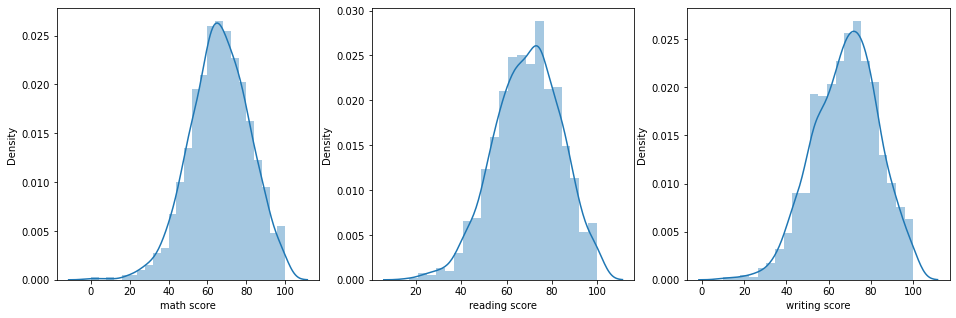

In [14]:
# there is no skewness in the Target Columns

plt.figure(figsize = (16,5))

plt.subplot(1, 3, 1)
sns.distplot(StudentsPerformance['math score'])

plt.subplot(1, 3, 2)
sns.distplot(StudentsPerformance['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(StudentsPerformance['writing score'])

plt.show()

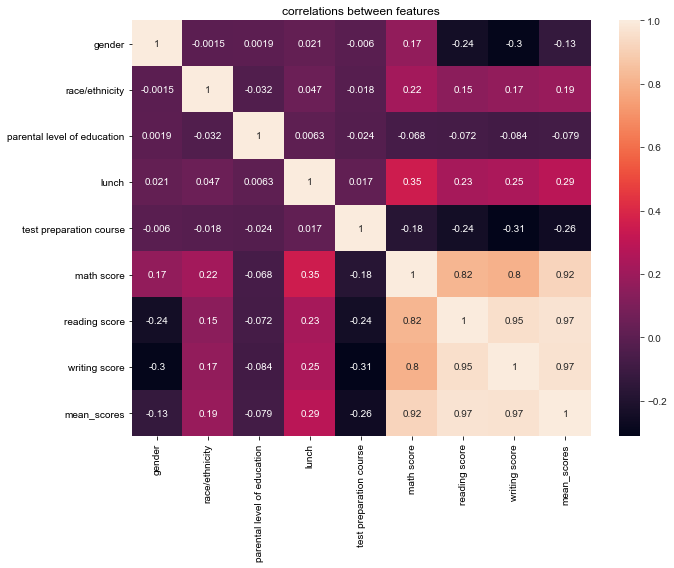

In [17]:
# Transforming categorical features and reviewing correlations 

df_le = StudentsPerformance.copy()
col  = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']
for _ in col:
    df_le[_] = LabelEncoder().fit_transform(df_le[_])

corelation_2 = df_le.corr()

# correlations

fig, ax = plt.subplots(figsize =(10,8)) 
sns.set_style('darkgrid')
plt.title('correlations between features')
sns.heatmap(corelation_2, annot=True)
fig.tight_layout()
plt.show()

In [18]:
math_score = StudentsPerformance["math score"]
reading_score = StudentsPerformance["reading score"]
writing_score = StudentsPerformance["writing score"]
mean_score = StudentsPerformance["mean_scores"]
X_features = StudentsPerformance.drop(["math score","reading score","writing score","mean_scores"],axis = 'columns') 

In [19]:
X_features_encoded = X_features.apply(lambda x: x.astype('category')) 

X_features_encoded = pd.get_dummies(X_features_encoded,drop_first= True)
X_features_encoded

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,1,0,0,1,0
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


In [20]:
# test test
target = mean_score
X_train, X_val, y_train, y_val = train_test_split(X_features_encoded, 
                                                      target, 
                                                      test_size=0.4, 
                                                      shuffle = True, 
                                                      random_state=1)

In [34]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_scor
def evaluateRegressionModel(true,predicted,message = "Test set"):
    MSE = mean_squared_error(true,predicted)
    MAE = mean_absolute_error(true,predicted)
    RMSE = np.sqrt(mean_squared_error(true,predicted))
    # RMSE = mean_squared_error(true,predicted)
    R_squared = r2_score(true,predicted)
    p = len(X_train.columns)
    n = len(X_train)
    adjusted_R = 1-(1-R_squared)*(n-1)/(n-p-1)
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("R-squared:", R_squared)
    print("Adjusted R-squared:", adjusted_R)

In [35]:
## Random Forest and Linear Model
print("Random Forest Regressor")
print("------------")
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf_pred = rf.predict(X_train)
print("Train set of RF")
evaluateRegressionModel(y_train,rf_pred)

print("------------")
print("Test set of RF")
rf_pred_val= rf.predict(X_val)
evaluateRegressionModel(y_val,rf_pred_val)

print("------------")


print("Linear Regression")
print("------------")
lr = LinearRegression(normalize=True).fit(X_train, y_train)
lr_pred = lr.predict(X_train)
print("Train set of LR")
evaluateRegressionModel(y_train,lr_pred)

print("------------")
print("Test set of LR")
lr_pred_val= lr.predict(X_val)
evaluateRegressionModel(y_val,lr_pred_val)

Random Forest Regressor
------------
Train set of RF
Test set
MSE: 115.90072553034474
MAE: 8.51657283198374
RMSE: 10.765719926244818
R-squared: 0.4187860390482202
Adjusted R-squared: 0.40690432264034737
------------
Test set of RF
Test set
MSE: 215.9902017661173
MAE: 11.567982895617455
RMSE: 14.69660511023268
R-squared: -0.03571311251240061
Adjusted R-squared: -0.05688612333037124
------------
Linear Regression
------------
Train set of LR
Test set
MSE: 152.9455853821692
MAE: 10.06289021842909
RMSE: 12.367117100689603
R-squared: 0.23301507317324577
Adjusted R-squared: 0.2173356538854756
------------
Test set of LR
Test set
MSE: 159.6887860775392
MAE: 10.087742388163699
RMSE: 12.636802842394083
R-squared: 0.2342626271501531
Adjusted R-squared: 0.21860871152119543


C:\Users\swim_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
X_features2 = StudentsPerformance[['race/ethnicity', 'lunch']].copy()
X_features2

,race/ethnicity,lunch
0,group B,standard
1,group C,standard
2,group B,standard
3,group A,free/reduced
4,group C,standard
...,...,...
995,group E,standard
996,group C,free/reduced
997,group C,free/reduced
998,group D,standard


In [41]:
# model with less independent variables (only lunch and race/ethnicity)
X_features2_encoded = X_features2.apply(lambda x: x.astype('category')) 

X_features2_encoded = pd.get_dummies(X_features2_encoded,drop_first= True)
X_features2_encoded

,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard
0,1,0,0,0,1
1,0,1,0,0,1
2,1,0,0,0,1
3,0,0,0,0,0
4,0,1,0,0,1
...,...,...,...,...,...
995,0,0,0,1,1
996,0,1,0,0,0
997,0,1,0,0,0
998,0,0,1,0,1


In [42]:
# test test
target = mean_score
X_train, X_val, y_train, y_val = train_test_split(X_features2_encoded, 
                                                      target, 
                                                      test_size=0.4, 
                                                      shuffle = True, 
                                                      random_state=1)

In [43]:
## Random Forest and Linear Model
print("Random Forest Regressor")
print("------------")
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf_pred = rf.predict(X_train)
print("Train set of RF")
evaluateRegressionModel(y_train,rf_pred)

print("------------")
print("Test set of RF")
rf_pred_val= rf.predict(X_val)
evaluateRegressionModel(y_val,rf_pred_val)

print("------------")


print("Linear Regression")
print("------------")
lr = LinearRegression(normalize=True).fit(X_train, y_train)
lr_pred = lr.predict(X_train)
print("Train set of LR")
evaluateRegressionModel(y_train,lr_pred)

print("------------")
print("Test set of LR")
lr_pred_val= lr.predict(X_val)
evaluateRegressionModel(y_val,lr_pred_val)

Random Forest Regressor
------------
Train set of RF
Test set
MSE: 180.01364822531153
MAE: 10.730090441110887
RMSE: 13.41691649468355
R-squared: 0.09727531875526796
Adjusted R-squared: 0.08967662615219785
------------
Test set of RF
Test set
MSE: 180.80303636395206
MAE: 10.586893394004722
RMSE: 13.446301958678157
R-squared: 0.13301587751200805
Adjusted R-squared: 0.12571803136311932
------------
Linear Regression
------------
Train set of LR
Test set
MSE: 180.79727749873584
MAE: 10.740323341846011
RMSE: 13.446087813886084
R-squared: 0.09334560846363171
Adjusted R-squared: 0.0857138374911034
------------
Test set of LR
Test set
MSE: 179.91104256658494
MAE: 10.624699659400864
RMSE: 13.41309220748836
R-squared: 0.13729315335442438
Adjusted R-squared: 0.13003131121094302


C:\Users\swim_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
